# Clustering

- Fazendo a Segmentação de Clientes

#### 01) Carregando a Base de Dados tratados na Análise Exploratória

In [1]:
# Importando a biblioteca
import os

# Definindo a quantidade de THREADS a ser utilizada pelo KMeans
# Obs.1: suprimindo o aviso de falha de vazamento de memória do windows quando está utilizando o algoritmo KMeans 
# Obs.2: basicamente acontece quando o computador possui mais de um núcleo de processamento, dependendo da versão do Scikit-learn
os.environ["OMP_NUM_THREADS"] = "9"

In [2]:
# Importando a biblioteca
import pandas as pd

# Atribuindo à constante "DATA" o caminho e o nome do arquivo csv
DATA = "../data/customers_new_features_and_drop.csv"

# Carregando o arquivo csv que foi tratado na Análise Exploratória e atribuindo ao DataFrame "df"
df = pd.read_csv(DATA)

# Visualizando as 5 primeiras linhas do DataFrame
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,YearsSinceEnrolled,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,57,46-60,1617,1529,0,0,0,0,22
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,60,46-60,27,21,2,1,0,0,4
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,0,49,46-60,776,734,0,0,0,0,20
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,0,30,18-30,53,48,1,1,0,0,6
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,0,33,31-45,422,407,1,1,0,0,14


In [3]:
# Visualizando as informações referentes às colunas do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Recency              2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  NumWebPurchases      2205 non-null   int64  
 14  NumCatalogPurchases  2205 non-null   int64  
 15  NumStorePurchases    2205 non-null   i

#### 02) Iniciando a Etapa de Pré Processamento

- ``Documentação do Scikit-learn para pré processamento de dados:``
    - https://scikit-learn.org/stable/modules/preprocessing.html
    - https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
    - https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
    - https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html

In [4]:
# Selecionando as Colunas (Variáveis) Numéricas do DataFrame e atribuindo à variável "numerical_features"
numerical_features = df.select_dtypes(include = "number").columns

# Exibindo a quantidade de colunas (variáveis) numéricas do DataFrame
len(numerical_features)

32

#### Exibindo os Histogramas das Variáveis Numéricas em um único gráfico

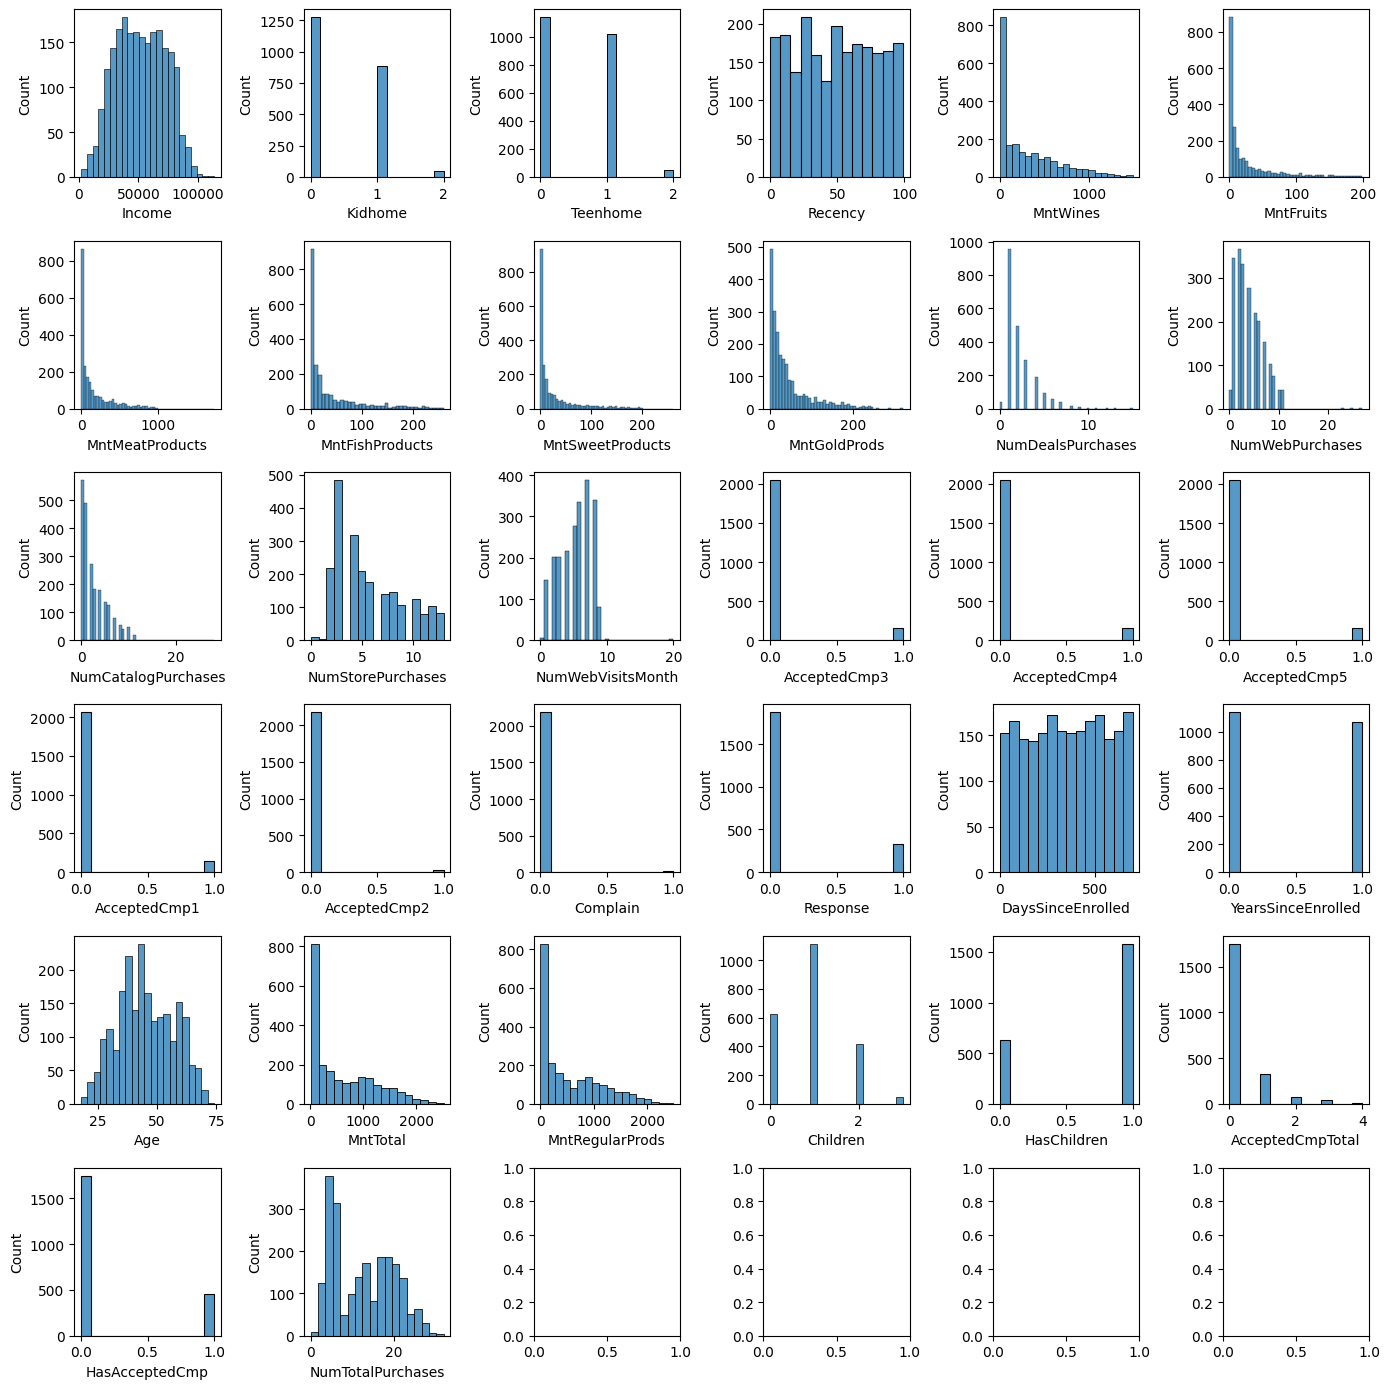

In [5]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# Criando uma figura com sistema de eixos de 6 linhas e 6 colunas
fig, axs = plt.subplots(nrows = 6, ncols = 6, figsize = (14, 14), tight_layout = True)

# Percorrendo cada eixo e cada feature (coluna) no sistema de eixos e colunas
# Obs.: usando o .flatten() para pegar o primeiro eixo do array e não a primeira linha do sistema de eixos
for ax, feature in zip(axs.flatten(), numerical_features):
    # Plotando o Histograma
    sns.histplot(x = feature, ax = ax, data = df)

# Exibindo os gráficos (Histogramas)
plt.show()

- Observando os Histogramas verificamos que algumas features possuem o comportamento de uma Distribuição Normal ao contrário da maioria das colunas

#### Separando as Colunas de acordo com a análise dos Histogramas

- Analisando as colunas e definindo qual é a transformação mais adequada para cada coluna

In [6]:
# Atribuindo à variável "one_hot_cols" uma lista das colunas categóricas que serão passadas para o OneHotEncoder
# Obs.: passando as colunas object, as colunas com valores 0 e 1 e as colunas que contém valores inteiros discretos
one_hot_cols = [
    "Education",
    "Marital_Status",
    "AgeGroup",
    "HasChildren",
    "HasAcceptedCmp",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Complain",
    "Response",
    "Kidhome",
    "Teenhome",
    "YearsSinceEnrolled",
    "Children",
    "AcceptedCmpTotal",
]

# Atribuindo à variável "standard_cols" as colunas que serão passadas para o Standard Scaler
# Obs.: passando as colunas que se assemelham a uma Distribuição Normal
standard_cols = [
    "Income",
    "Age",
]

# Atribuindo à variável "power_cols" as colunas que serão submetidas a tratamento pelo PowerTransformer do Scikit-learn, considerando o perfil com decrescente quase de forma exponencial, fazendo a transformação de modo que ela se pareça com uma Distribuição Normal
# Obs.: fazendo um filtro das colunas do DataFrame e usando o parâmetro .tolist() para passar de um objeto do tipo índice transformando em uma lista
power_cols = df.columns[
    # Pegando as colunas que iniciam com "Mnt" e "Num"
    df.columns.str.startswith("Mnt") | df.columns.str.startswith("Num")
].tolist()

# Atribuindo à variável "minmax_cols" uma lista das colunas em que faremos o ajuste de escala usando o MinMaxScaler
minmax_cols = [
    # Fazendo um List Comprehension passando por todas as colunas do DataFrame que não estão nas lista anteriores, ou seja, pegando as colunas restantes
    # Obs.: procurando por coluna para cada coluna que está no DataFrame desde que essa coluna não esteja em nenhuma das 3 listas 
    col for col in df.columns if col not in one_hot_cols + standard_cols + power_cols
]

In [7]:
# Visualizando as Listas
display(one_hot_cols)
display(standard_cols)
display(power_cols)
display(minmax_cols)

['Education',
 'Marital_Status',
 'AgeGroup',
 'HasChildren',
 'HasAcceptedCmp',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Complain',
 'Response',
 'Kidhome',
 'Teenhome',
 'YearsSinceEnrolled',
 'Children',
 'AcceptedCmpTotal']

['Income', 'Age']

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'MntTotal',
 'MntRegularProds',
 'NumTotalPurchases']

['Recency', 'DaysSinceEnrolled']

#### Fazendo as Transformações (diferentes pré processamentos para diferentes colunas)

- A primeira parte do Pipeline (pré processamento) é a transformação de colunas

In [8]:
# Instalando as bibliotecas
# pip install scikit-learn preprocessing
# pip install scikit-learn compose

# Importando as bibliotecas 
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
)
from sklearn.compose import ColumnTransformer

# Atribuindo à variável "preprocessing" um conjunto de colunas
# Obs.1: passando para o ColumnTransformer uma Lista de Tuplas para cada transformação
# Obs.2: não foi realizada nenhuma alteração dos parâmetros (Ver documentação se desejar efetuar)
preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols),
    ]
)

# Fazendo o fit_transform para o DataFrame
# Obs.: são exibidos os valores da transformação
preprocessing.fit_transform(df)

array([[ 0.        ,  0.        ,  1.        , ...,  1.31554348,
         1.3107051 ,  1.22117404],
       [ 0.        ,  0.        ,  1.        , ..., -1.44715317,
        -1.45392396, -1.31943784],
       [ 0.        ,  0.        ,  1.        , ...,  0.65850681,
         0.68796397,  1.02538786],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.06873119,
         1.10901986,  0.81760731],
       [ 0.        ,  0.        ,  0.        , ...,  0.72839023,
         0.73883475,  1.12466774],
       [ 0.        ,  0.        ,  0.        , ..., -0.44741865,
        -0.42493797, -0.5090171 ]])

In [9]:
# Exibindo os nomes de saída de cada coluna de acordo com a String utilizada no ColumnTransformer
preprocessing.get_feature_names_out()

array(['one-hot__Education_2n Cycle', 'one-hot__Education_Basic',
       'one-hot__Education_Graduation', 'one-hot__Education_Master',
       'one-hot__Education_PhD', 'one-hot__Marital_Status_Partner',
       'one-hot__Marital_Status_Single', 'one-hot__AgeGroup_18-30',
       'one-hot__AgeGroup_31-45', 'one-hot__AgeGroup_46-60',
       'one-hot__AgeGroup_61+', 'one-hot__HasChildren_0',
       'one-hot__HasChildren_1', 'one-hot__HasAcceptedCmp_0',
       'one-hot__HasAcceptedCmp_1', 'one-hot__AcceptedCmp1_0',
       'one-hot__AcceptedCmp1_1', 'one-hot__AcceptedCmp2_0',
       'one-hot__AcceptedCmp2_1', 'one-hot__AcceptedCmp3_0',
       'one-hot__AcceptedCmp3_1', 'one-hot__AcceptedCmp4_0',
       'one-hot__AcceptedCmp4_1', 'one-hot__AcceptedCmp5_0',
       'one-hot__AcceptedCmp5_1', 'one-hot__Complain_0',
       'one-hot__Complain_1', 'one-hot__Response_0',
       'one-hot__Response_1', 'one-hot__Kidhome_0', 'one-hot__Kidhome_1',
       'one-hot__Kidhome_2', 'one-hot__Teenhome_0', 'one-

In [10]:
# Juntando os nomes de saída com os valores e atribuindo a um Novo DataFrame
df_scaled = pd.DataFrame(
    # Pegando os valores da transformação do ColumnTransformer
    preprocessing.fit_transform(df),
    # Pegando os nomes de saída do ColumnTransformer
    columns = preprocessing.get_feature_names_out()
)

# Exibindo as 5 primeiras linhas do DataFrame
df_scaled.head()

,one-hot__Education_2n Cycle,one-hot__Education_Basic,one-hot__Education_Graduation,one-hot__Education_Master,one-hot__Education_PhD,one-hot__Marital_Status_Partner,one-hot__Marital_Status_Single,one-hot__AgeGroup_18-30,one-hot__AgeGroup_31-45,one-hot__AgeGroup_46-60,...,power__MntSweetProducts,power__MntGoldProds,power__NumDealsPurchases,power__NumWebPurchases,power__NumCatalogPurchases,power__NumStorePurchases,power__NumWebVisitsMonth,power__MntTotal,power__MntRegularProds,power__NumTotalPurchases
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.387173,1.089046,0.753752,1.332973,1.747828,-0.425453,0.700269,1.315543,1.310705,1.221174
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.976308,-0.947497,0.160834,-1.382228,-0.384719,-1.473644,-0.108417,-1.447153,-1.453924,-1.319438
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.546813,0.442997,-0.838557,1.332973,0.150188,1.239811,-0.527390,0.658507,0.687964,1.025388
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.525155,-1.052464,0.160834,-0.726457,-1.341911,-0.425453,0.300240,-1.123214,-1.066232,-0.877589
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.694250,-0.350932,1.453779,0.521339,0.518935,0.278071,-0.108417,0.175065,0.238799,0.356875


In [11]:
# Criando uma Lista com todas as colunas exceto as que passaram pelo OneHotEncoder pois possuem apenas valores 0 e 1
# Obs.: usando o "~" para fazer a negação, ou seja, filtrar somente as colunas que não possuem a String "one"
scaled_columns_not_one_hot = df_scaled.columns[~df_scaled.columns.str.startswith("one")]

# Exibindo a Lista das colunas selecionadas
scaled_columns_not_one_hot

Index(['standard__Income', 'standard__Age', 'minmax__Recency',
       'minmax__DaysSinceEnrolled', 'power__MntWines', 'power__MntFruits',
       'power__MntMeatProducts', 'power__MntFishProducts',
       'power__MntSweetProducts', 'power__MntGoldProds',
       'power__NumDealsPurchases', 'power__NumWebPurchases',
       'power__NumCatalogPurchases', 'power__NumStorePurchases',
       'power__NumWebVisitsMonth', 'power__MntTotal', 'power__MntRegularProds',
       'power__NumTotalPurchases'],
      dtype='object')

In [12]:
# Exibindo a quantidade de colunas 
len(scaled_columns_not_one_hot)

18

#### Exibindo os Histogramas após o Pré Processamento

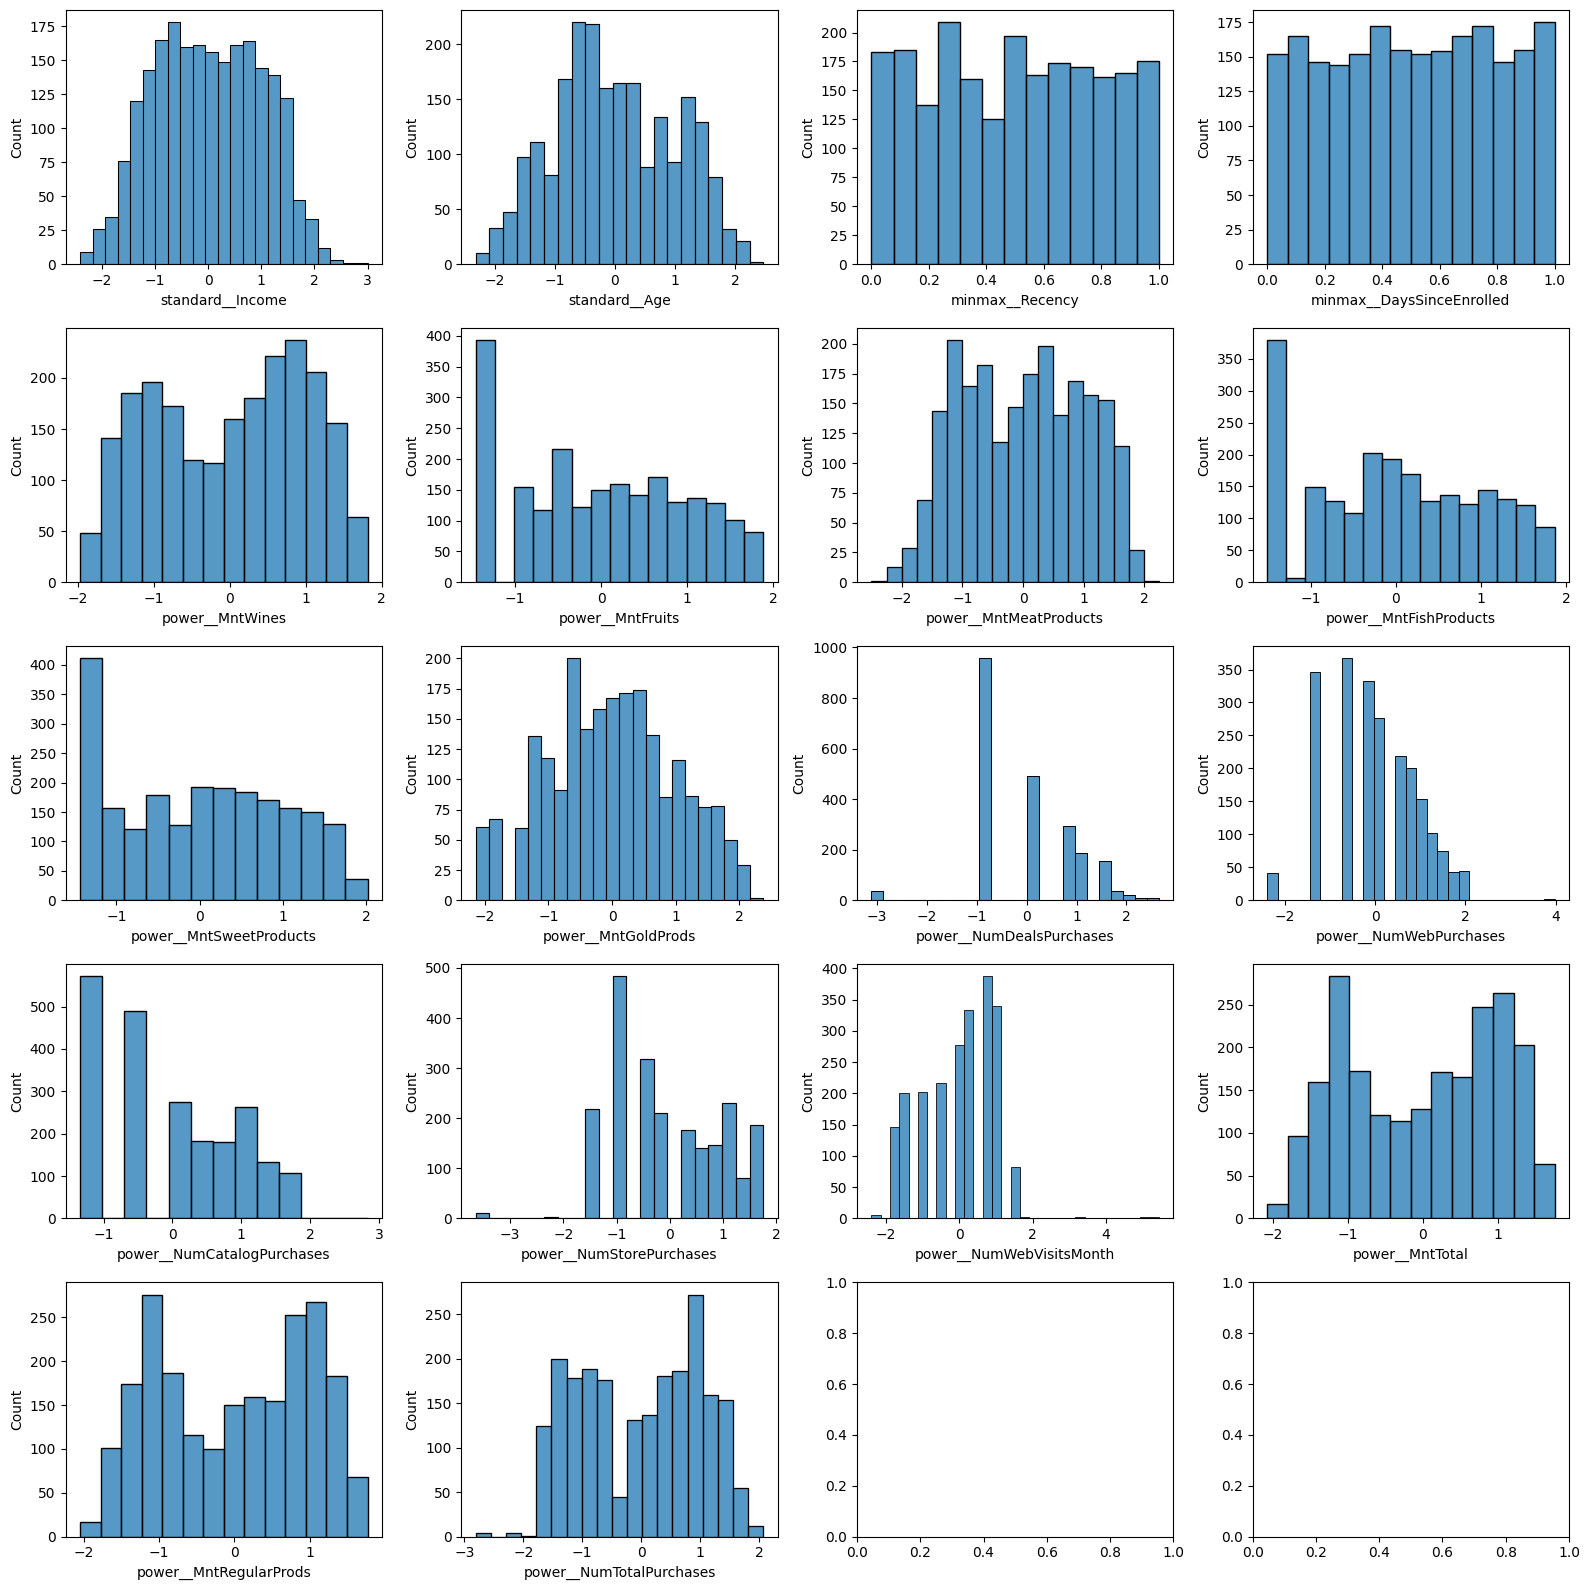

In [13]:
# Criando uma figura num sistema de eixos com 5 linhas e 4 colunas
fig, axs = plt.subplots(nrows = 5, ncols = 4, figsize = (16, 16), tight_layout = True)

# Percorrendo cada eixo e cada feature (coluna) no sistema de eixos e colunas
# Obs.1: usando o .flatten() para pegar o primeiro eixo do array e não a primeira linha do sistema de eixos
# Obs.2: passando a Lista de Colunas selecionadas (sem as colunas one-hot)
for ax, feature in zip(axs.flatten(), scaled_columns_not_one_hot):
    # Plotando o Histograma para o DataFrame "df_scaled"
    sns.histplot(x = feature, ax = ax, data = df_scaled)

# Exibindo os gráficos
plt.show()

- ``Analisando os Histogramas após o Pré Processamento, observamos que:``
    - As escalas agora estão centradas em 0 para as colunas com transformações standard e power;
    - A mudança da escala para as colunas com transformações minmax;
    - As colunas com as transformações power estão com uma distribuição mas próxima de uma Distribuição Normal;
    - Todas as colunas estão mais ou menos na mesma escala, sendo muito importante para os Algoritmos que utilizaremos pois envolve o distanciamento entre pontos;

#### Criando os gráficos para análise e determinação da quantidade de Clusters

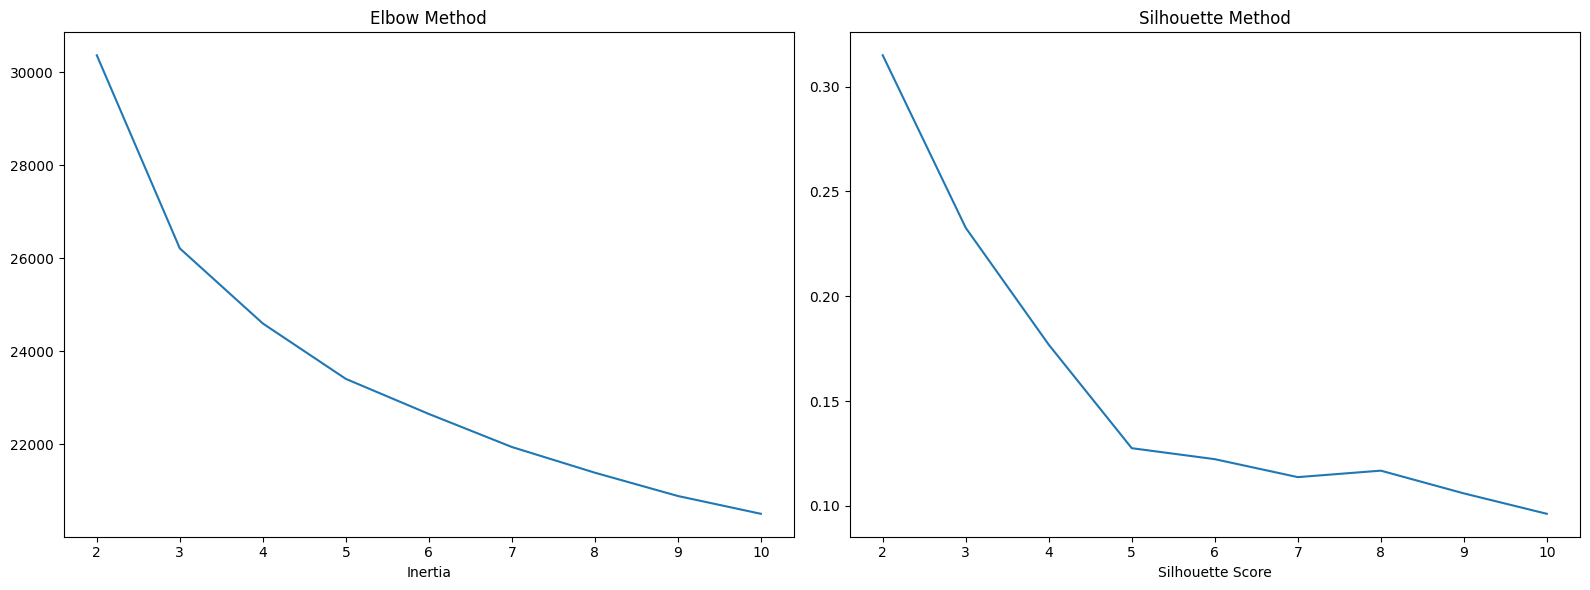

In [14]:
# Importando a função genérica que foi criada para gerar os gráficos elbow e silhouette
from auxiliary_functions import plot_elbow_silhouette

# Chamando a function e aplicando para o DataFrame
plot_elbow_silhouette(df_scaled)

- ``Analisando os gráficos:``
    - No Elbow Method é perceptível a quebra mais acentuada no Valor igual a 3;
    - No Silhouette Method no Valor igual a 3, apesar de não ser muito acentuada a quebra ainda é um valor alto;
    - Lembrando que estamos num Método não supervisionado, então os valores 3 ou 4 são razoáveis e utilizaremos o valor 3;
    - O conhecimento do negócio é bastante relevante no momento de definir qual quantidade de clusters utilizar;

#### Fazendo a Clusterização

In [15]:
# Importando as bibliotecas
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Criando a Constante RANDOM_STATE e definindo o valor para que o modelo possa ser repetido
RANDOM_STATE = 42

# Aplicando as transformações (pré-processamento) às Colunas e atribuindo à variável "preprocessing"
# Obs.1: passando uma lista com uma tupla que contém o nome da 1° etapa, quem vai fazer a transformação e a variável "preprocessing" que contém a lista das colunas;
# Obs.2: na outra tupla contém o nome da 2° etapa, usando o algoritmo Kmeans que vai fazer a transformação e o nome da coluna
pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("clustering", KMeans(n_clusters = 3, random_state = RANDOM_STATE, n_init = 10))
    ]
)

# Fazendo o fit para o DataFrame original, pois temos a etapa de pre processamento no Pipeline
pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Response', 'Kidhome',
                                                   'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal']),
                                                 ('standard', Sta...
                                                   'DaysSinceEnrolled']),
                                                 ('power', PowerTransformer(),
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [16]:
# Exibindo os nomes de saída das features (colunas) para as 3 clusters
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2'], dtype=object)

In [17]:
# Os named_steps são todas as etapas que tem nomes
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                  ['Education', 'Marital_Status', 'AgeGroup',
                                   'HasChildren', 'HasAcceptedCmp',
                                   'AcceptedCmp1', 'AcceptedCmp2',
                                   'AcceptedCmp3', 'AcceptedCmp4',
                                   'AcceptedCmp5', 'Complain', 'Response',
                                   'Kidhome', 'Teenhome', 'YearsSinceEnrolled',
                                   'Children', 'AcceptedCmpTotal']),
                                 ('standard', StandardScaler(),
                                  ['Income', 'Age']),
                                 ('minmax', MinMaxScaler(),
                                  ['Recency', 'DaysSinceEnrolled']),
                                 ('power', PowerTransformer(),
                                  ['MntWines', 'MntFruits', 'MntMeatProducts',
                            

In [18]:
# Podemos ver os labels criados na etapa de clustering
pipeline["clustering"].labels_

array([0, 1, 0, ..., 0, 2, 1])

In [19]:
# Fazendo uma cópia do DataFrame original para um Novo DataFrame
df_clustered = df.copy()

# Incluindo uma nova coluna "clustes" que vai receber os labels, ou seja, os valores dos clusters
df_clustered["cluster"] = pipeline["clustering"].labels_

# Exibindo as 5 primeiras linhas do DataFrame
df_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2


In [20]:
# Exibindo os valores da coluna cluster e classificando pelo índice
# Obs.: esses valores dos clusters refere-se à quantidade de clientes em cada cluster
df_clustered["cluster"].value_counts().sort_index()

0    559
1    898
2    748
Name: cluster, dtype: int64

#### Selecionando as Colunas de interesse para Plotar os Gráficos

In [21]:
# Selecionando algumas colunas de interesse em uma Lista e atribuindo à variável "columns_analysis"
# Obs.: exatamente as mesmas colunas selecionadas na Análise Exploratória
columns_analysis = [
    "Income",
    "Recency",
    "DaysSinceEnrolled",
    "Age",
    "MntTotal",
]

#### Visualizando os Clusters Plotando Pairplot´s

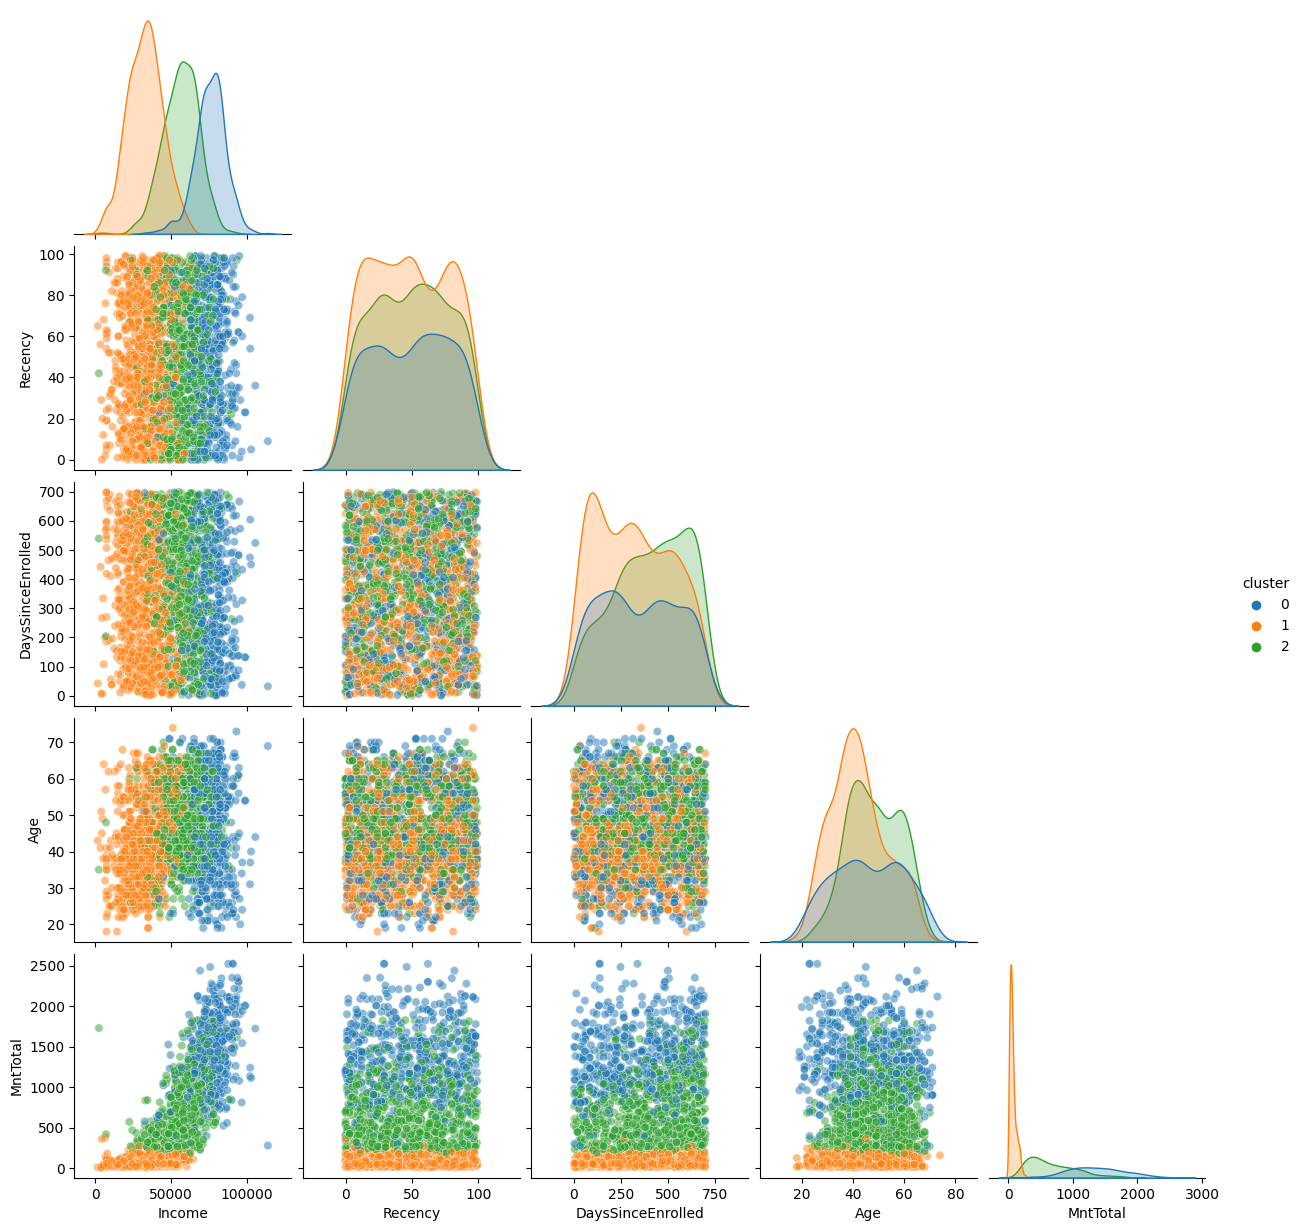

In [22]:
# Importando a função genérica que foi criada para gerar os pairplot's
from auxiliary_functions import pairplot

# Gerando os Pairplot´s
# Obs.: pasando como parâmetros o DataFrame clusterizado, a lista de colunas e para a hue_column a coluna cluster
pairplot(df_clustered, columns_analysis, hue_column = "cluster")

- ``Analisando os PairPlot's:``
    - A Renda Anual (Income) foi o principal critério para a Clusterização;

#### Visualizando os Clusters Plotando Boxplot´s

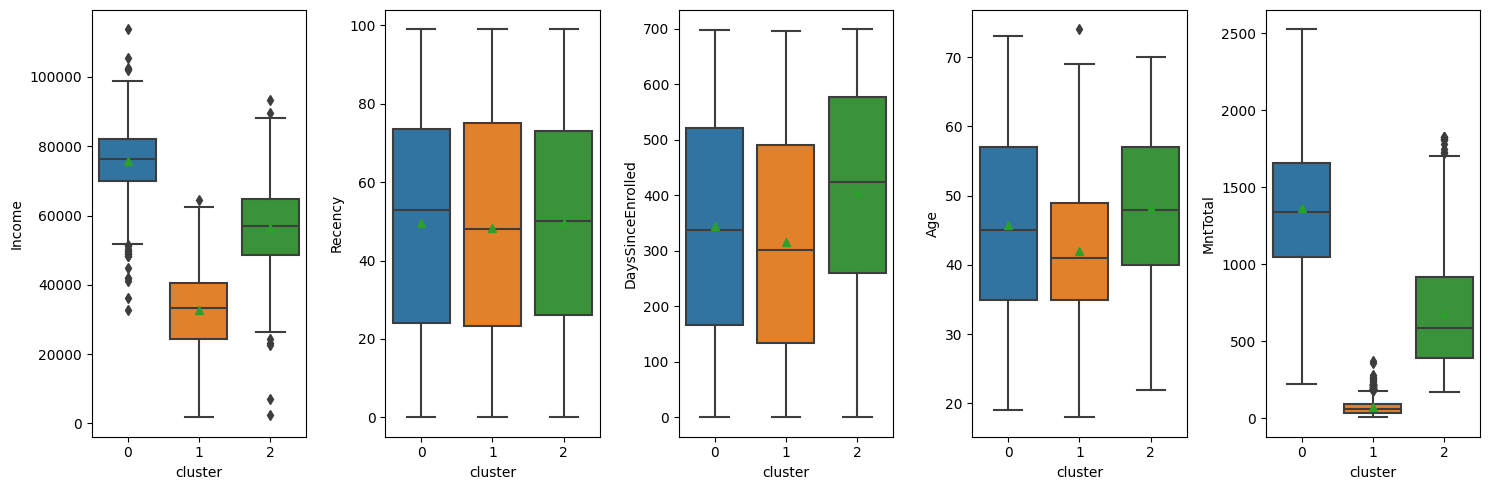

In [23]:
# Criando uma figura com um sistema de eixos de 1 Linha e 5 Colunas
fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (15, 5), tight_layout = True)

# Percorrendo cada sistema de eixo e cada feature (coluna) na combinação para a par com o sistema de eixos e as colunas de análise
for ax, col in zip(axs, columns_analysis):
    # Plotando o BoxPlot usando os parâmetros:
    # Obs.1: passando no eixo x a coluna cluster
    # Obs.2: passando no eixo y o valor da coluna que está sendo olhada
    # Obs.3: passando no conjunto de dados o df_clustered
    # Obs.4: o sistema de eixo é o ax
    # Obs.5: mostrando as médias
    sns.boxplot(x = "cluster", y = col, data = df_clustered, ax = ax, showmeans = True)

- ``Analisando os BoxPlot's:``
    - Como já havíamos observado nos PairPlot´s, os clientes no Cluster 0 são os de maior Renda Anual (Income), que foi o principal critério para a Clusterização, e uma quantidade considerável de Outliers;
    - Os clientes no Cluster 1 são os de menor Renda Anual (Income);
    - Os clientes no Cluster 2 são os de Renda Anual (Income) intermediária;

#### Selecionando Colunas Categóricas para Plotar os Gráficos

In [24]:
# Selecionando as colunas categóricas em uma Lista e atribuindo à variável "columns"
columns = [
    "HasChildren",
    "Marital_Status",
    "Education",
    "HasAcceptedCmp",
    "Response",
    "YearsSinceEnrolled",
]

# Criando uma lista com a Gasto Total e a Renda Total e atribuindo à variável "cluster_diff_cols"
# Obs.: essa duas colunas segregavam bastante os clusters
cluster_diff_cols = ["MntTotal", "Income"]

#### Plotando os Boxplot´s comparando o Gasto Total com a Lista de Colunas Categóricas

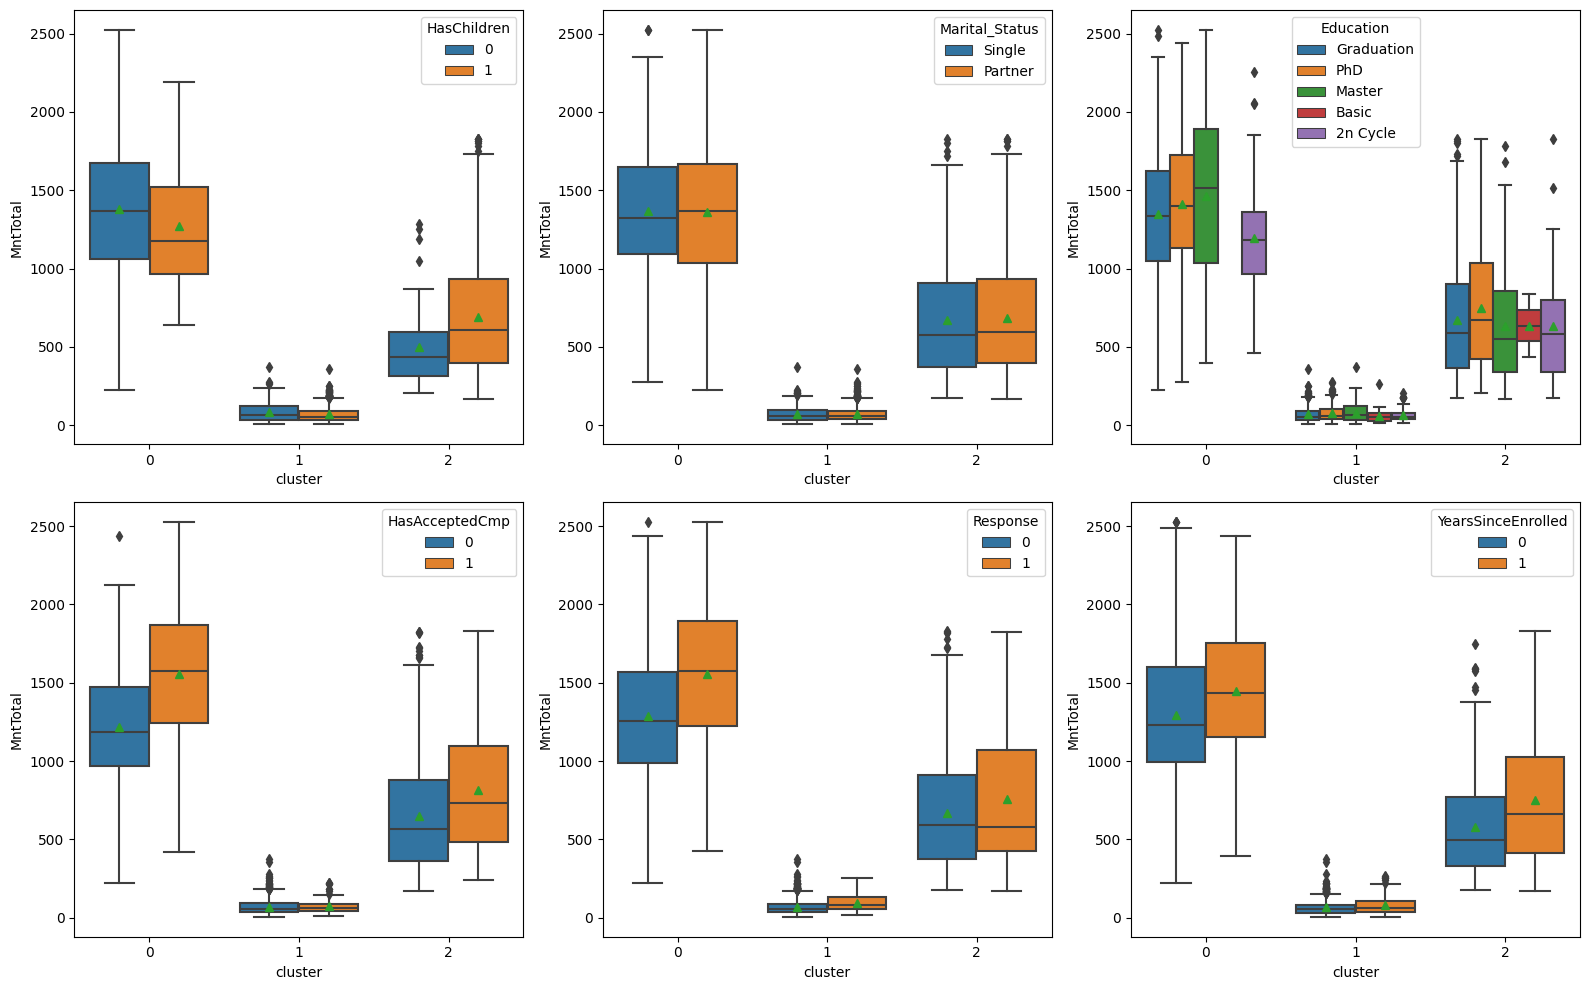

In [25]:
# Criando uma figura em um sistema de eixos com 2 Linhas e 3 Colunas
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10), tight_layout = True)

# Percorrendo cada sistema de eixo e cada feature (coluna) na combinação para a par com o sistema de eixos e as colunas de análise
for ax, col in zip(axs.flatten(), columns):
    # Plotando o BoxPlot usando os parâmetros:
    # Obs.1: passando no eixo x a coluna cluster
    # Obs.2: passando no eixo y o valor de índice "[0]" da coluna "cluster_diff_cols" que é o "MntTotal" Gasto Total
    # Obs.3: passando no conjunto de dados o df_clustered
    # Obs.4: o sistema de eixo é o ax
    # Obs.5: mostrando as médias
    # Obs.6: passando no hue o valor da coluna que está sendo olhada
    sns.boxplot(
        x = "cluster",
        y = cluster_diff_cols[0],
        data = df_clustered,
        ax = ax,
        showmeans = True,
        hue = col,
    )

- ``Analisando os BoxPlot´s segregados para cada uma das Colunas Categóricas:``
    - Os clientes no Cluster 0 são os com maior Gasto Total (MntTotal), os clientes no Cluster 1 são os com menor Gasto Total (MntTotal) e os clientes no Cluster 2 são os com Gasto Total (MntTotal) intermediário;
    - O 1° BoxPlot está segregado pela Coluna HasChildren e observa-se que nos Clusters 0 e 1 os clientes que não tem filhos gastando um pouco mais, enquanto que no Cluster 2 os clientes que tem filhos gastando um pouco mais;
    - O 2° BoxPlot está segregado pela Coluna Marital_Status e o comportamento é praticamente o mesmo nos 3 clusters;
    - O 3° BoxPlot está segregado pela Coluna Education e observa-se que no Cluster 0, que é dos clientes que gastam mais, não existe nenhum cliente com a Educação Básica, sendo que na Análise Exploratória já havíamos observado que os Cliente com Educação Básica são os que tem a menor Renda Anual e os de menor Gasto Total. Também observa-se que os clientes com maior gasto são aqueles que possuem maiores títulos como mestrado e doutorado e a mesma situação também é observada no Cluster 2;
    - O 4° BoxPlot está segregado pela Coluna HasAcceptedCmp observamos nos Clusters 0 e 2 que quem aceitou alguma campanha anterior são clientes que tem um perfil de Gastos maior, sendo que no Cluster 1 conforme já havíamos observado estão os clientes com perfil de gasto menor e tem a tendência de não aderir às campanhas;
    - O 5° BoxPlot está segregado pela Coluna Response, que é a variável alvo (target) na classificação, mostra que quem converteu nessa campanha piloto tem um perfil de gastos maior do que quem não converteu;
    - O 6° BoxPlot está segregado pela Coluna YearsSinceEnrolled percebe-se que nos Clusters 0 e 2 temos clientes que estão há mais tempo;

#### Plotando os Boxplot´s comparando a Renda Anual com a Lista de Colunas Categóricas

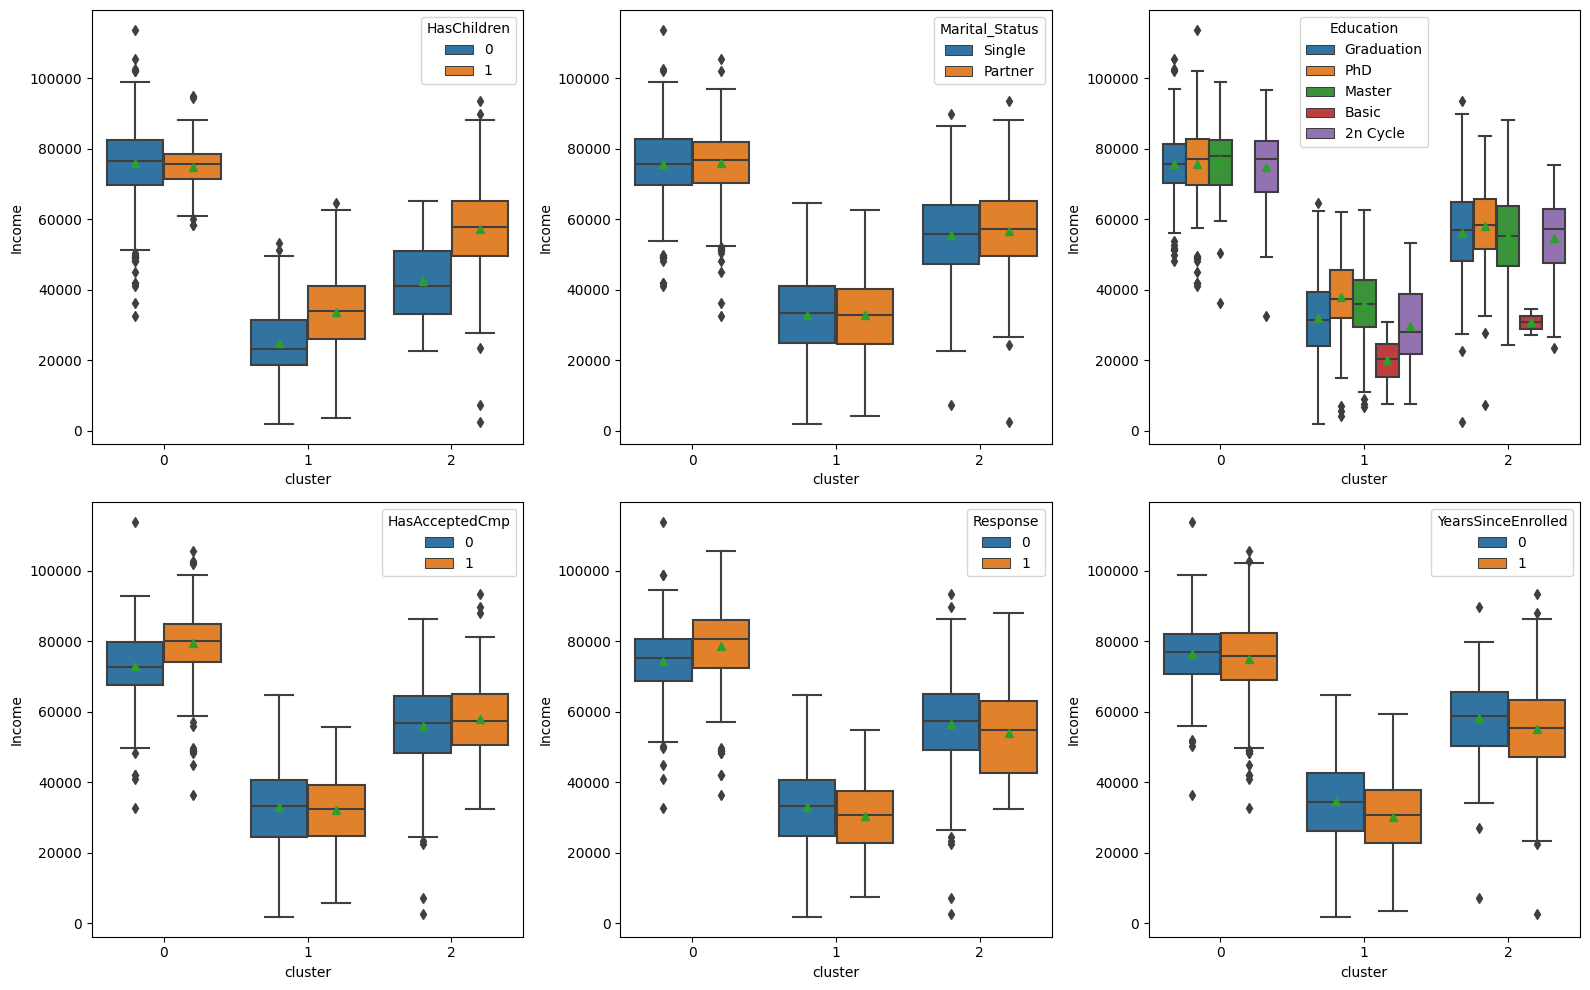

In [26]:
# Criando uma figura em um sistema de eixos com 2 Linhas e 3 Colunas
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10), tight_layout = True)

# Percorrendo cada sistema de eixo e cada feature (coluna) na combinação para a par com o sistema de eixos e as colunas de análise
for ax, col in zip(axs.flatten(), columns):
    # Plotando o BoxPlot usando os parâmetros:
    # Obs.1: passando no eixo x a coluna cluster
    # Obs.2: passando no eixo y o valor de índice "[1]" da coluna "cluster_diff_cols" que é o "Income" Renda Anual
    # Obs.3: passando no conjunto de dados o df_clustered
    # Obs.4: o sistema de eixo é o ax
    # Obs.5: mostrando as médias
    # Obs.6: passando no hue o valor da coluna que está sendo olhada
    sns.boxplot(
        x = "cluster",
        y = cluster_diff_cols[1],
        data = df_clustered,
        ax = ax,
        showmeans = True,
        hue = col,
    )

- ``Analisando os BoxPlot´s segregados para cada uma das Colunas Categóricas:``
    - Os clientes no Cluster 0 são os com maior Renda Anual (Income), os clientes no Cluster 1 são os com menor Renda Anual (Income) e os clientes no Cluster 2 são os com Renda Anual (Income) intermediária;
    - O 1° BoxPlot está segregado pela Coluna HasChildren e observa-se que no Cluster 0 não tem muita diferença entre quem tem ou não tem filhos. Enquanto que nos Clusters 1 e 2 os clientes que tem filhos possuem uma Renda Anual maior;
    - O 2° BoxPlot está segregado pelo Estado Civil, Coluna Marital_Status, e o comportamento é praticamente o mesmo nos 3 clusters;
    - O 3° BoxPlot está segregado pela Coluna Education e observa-se que no Cluster 0, que é dos clientes de maior Renda Anual, não existe nenhum cliente com a Educação Básica, sendo que na Análise Exploratória já havíamos observado que os Cliente com Educação Básica são os que tem a menor Renda Anual e os de menor Gasto Total. Também observa-se que os clientes com maior Renda Anual são aqueles que possuem maiores títulos como mestrado e doutorado e a mesma situação também é observada nos Clusters 1 e 2;
    - O 4° BoxPlot está segregado pela Coluna HasAcceptedCmp observamos nos Clusters 0 e 2 que quem aceitou alguma campanha anterior são clientes que tem um perfil de Renda Anual maior, sendo que no Cluster 1 conforme já havíamos observado estão os clientes com perfil de Renda Anual menor e tem a tendência de não aderir às campanhas;
    - O 5° BoxPlot está segregado pela Coluna Response, que é a variável alvo (target) na classificação, mostra que no Cluster 0 quem converteu nessa campanha piloto tem um perfil de Renda Anual maior do que quem não converteu, entretanto nos Clusters 1 e 2 quem converteu tem a Renda Anual menor do que quem não converteu, mas faz-se necessária uma análise dos números relativos de clientes devido à quantidade de Outliers, sendo indicativo de que podemos ter uma base muito pequena de clientes;
    - O 6° BoxPlot está segregado pela Coluna YearsSinceEnrolled percebe-se que nos Clusters 0 e 2 temos clientes que estão há mais tempo;

#### ``Histograma com a proporção de clientes em cada Cluster``

- Criamos uma função genérica para gerar os Histogramas para analizarmos as proporções 

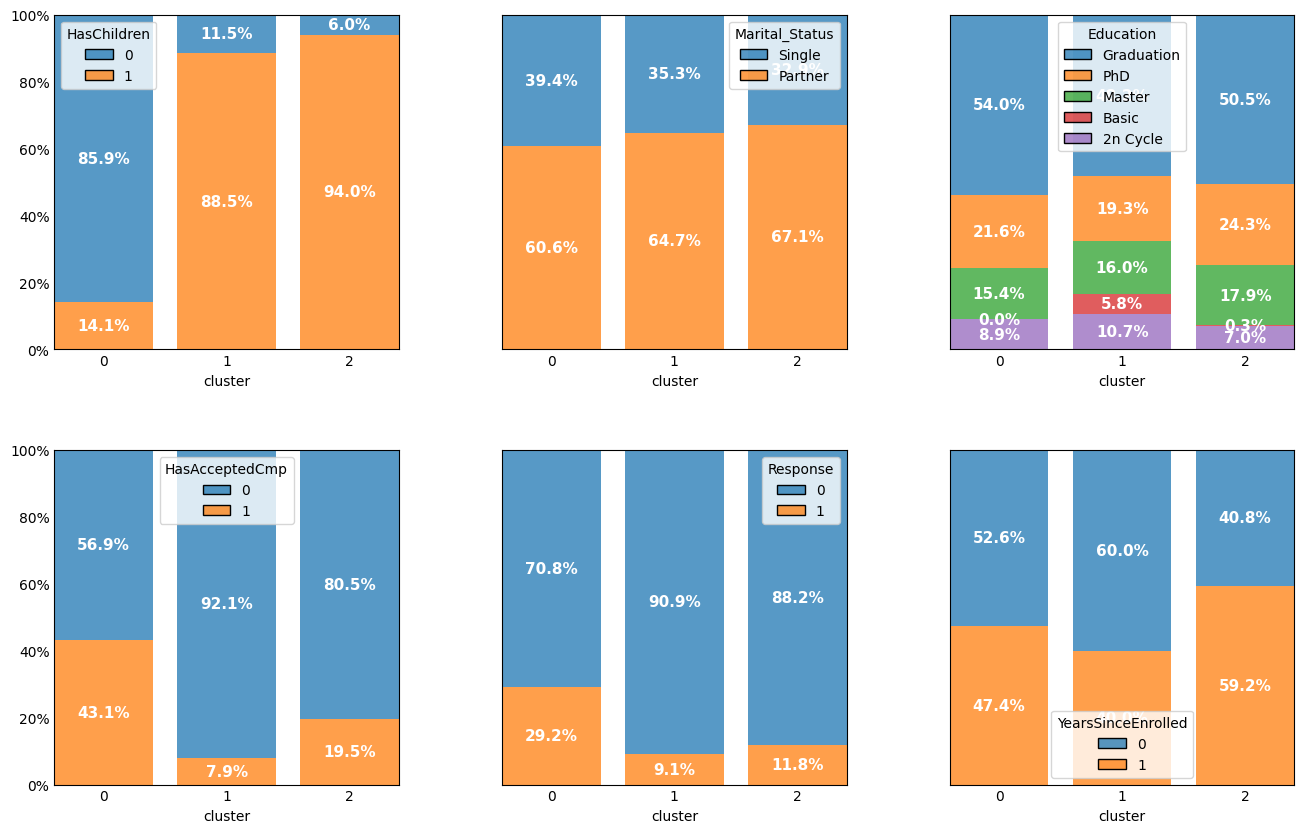

In [27]:
# Importando a função genérica que foi criada para gerar os Histogramas 
from auxiliary_functions import plot_columns_percent_by_cluster

# Chamando a função e passando os parâmetros
plot_columns_percent_by_cluster(
    # Passando o DataFrame Clusterizado "df_clustered" para a variável dataframe
    dataframe = df_clustered,
    # Passando a Lista de Colunas "columns" que definimos para a variável columns
    columns = columns,
)

- ``Analizando os Histogramas com base nas proporções:``
    - O Cluster 0 é predominantemente de clientes que não tem filhos, enquanto os Clusters 1 e 2 de clientes com filhos;
    - O Estado Civil não tem influência nos Clusters;
    - O Cluster 1 tem uma proporção sigmificativa de Educação Básica, sendo que nos demais níveis não existe uma variação muito grande nas porcentagens;
    - O Cluster 0 é o único que tem uma porcentagem relevante de clientes que aceitaram alguma das campanhas de marketing;
    - Da mesma forma é o que tem a maior porcentagem de Response, campanha piloto que deu origem a esse Dataset;
    - Com relação à coluna YearsSinceEnrolled o Cluster 1 é o que tem a maior porcentagem de clientes mais recentes, enquanto o Cluster 2 é o que tem maior quantidade de clientes há mais tempo na base;
    - As visualizações dos PairPlot´s, BoxPlot´s e de Proporções são complementares para ajudar nas análises;

#### ``Histograma com a proporção de clientes em cada Hue Cluster``

- Criamos uma função genérica para gerar os Histogramas para analizarmos as proporções 

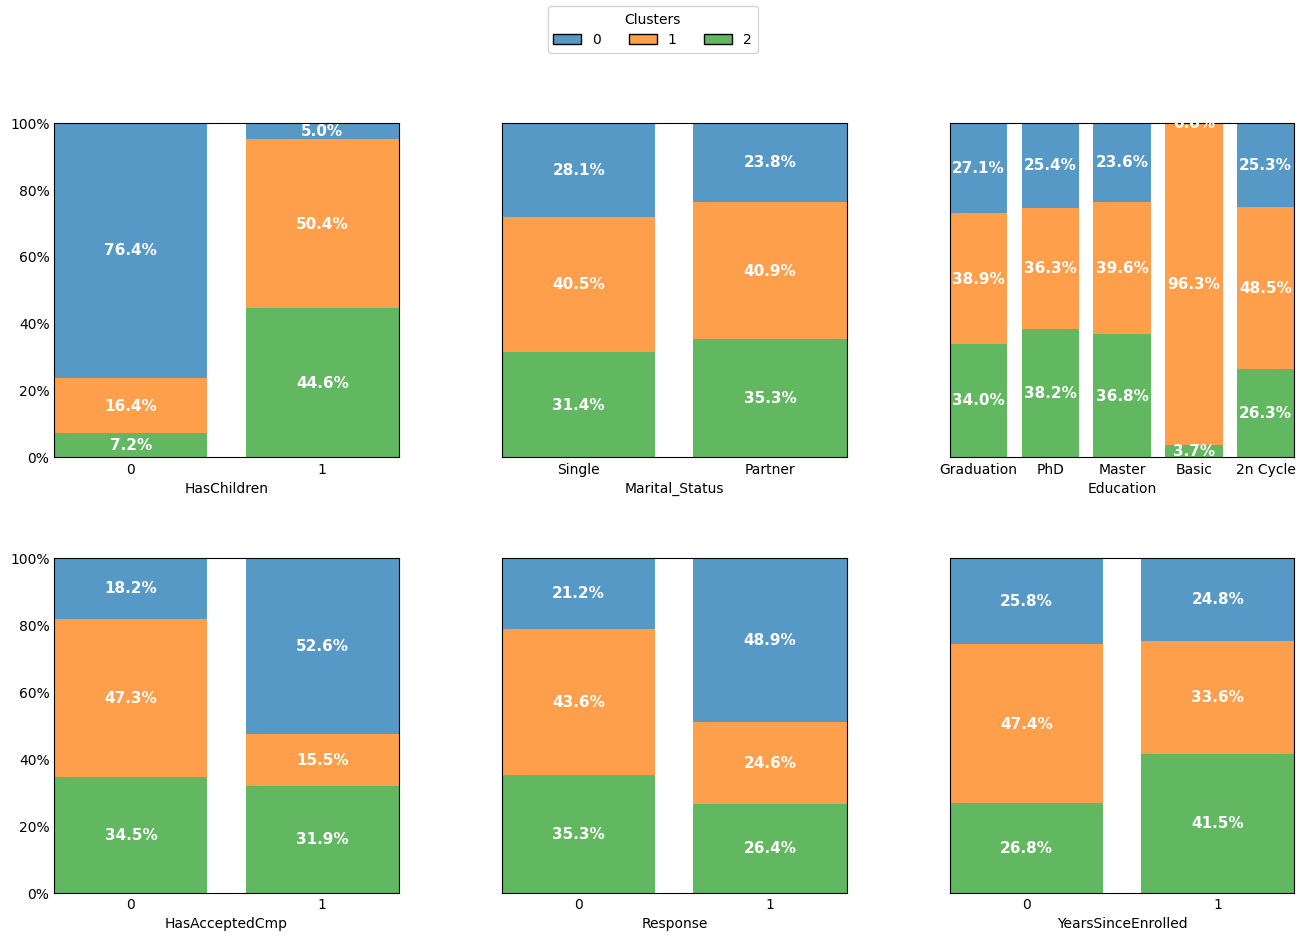

In [28]:
# Importando a função genérica que foi criada para gerar os Histogramas 
from auxiliary_functions import plot_columns_percent_hue_cluster

# Chamando a função e passando os parâmetros
plot_columns_percent_hue_cluster(
    # Passando o DataFrame Clusterizado "df_clustered" para a variável dataframe
    dataframe = df_clustered,
    # Passando a Lista de Colunas "columns" que definimos para a variável columns
    columns = columns,
)

- ``Analizando os Histogramas com base nas proporções:``
    - No histograma HasChildren, o Cluster 0 é majoritariamente (76,4%) de clientes que não tem filhos, enquanto os Clusters 1 e 2 são de clientes com filhos;
    - O histograma por Estado Civil não tem influência nos Clusters;
    - Analisando o histograma Education, observamos que o Cluster 1 tem a proporção de 96,3% de clientes com Educação Básica, sendo que nos demais níveis não existe uma variação muito grande nas porcentagens;
    - Nota-se no histograma HasAcceptedCmp que os clientes no Cluster 0 tem 52,6% de clientes que aceitaram alguma das campanhas de marketing;
    - Da mesma forma os clientes do Cluster 0 são os que tem a maior porcentagem no histograma Response, campanha piloto que deu origem a esse Dataset;
    - Com relação ao histograma YearsSinceEnrolled o Cluster 1 é o que tem a maior porcentagem de clientes há menos de um ano, enquanto o Cluster 2 é o que tem maior quantidade de clientes há mais tempo na base;
    - As visualizações dos PairPlot´s, BoxPlot´s e de Proporções são complementares para ajudar nas análises;

#### Visualizando colunas separadamente

- Por exemplo a coluna ``AcceptedCmpTotal``

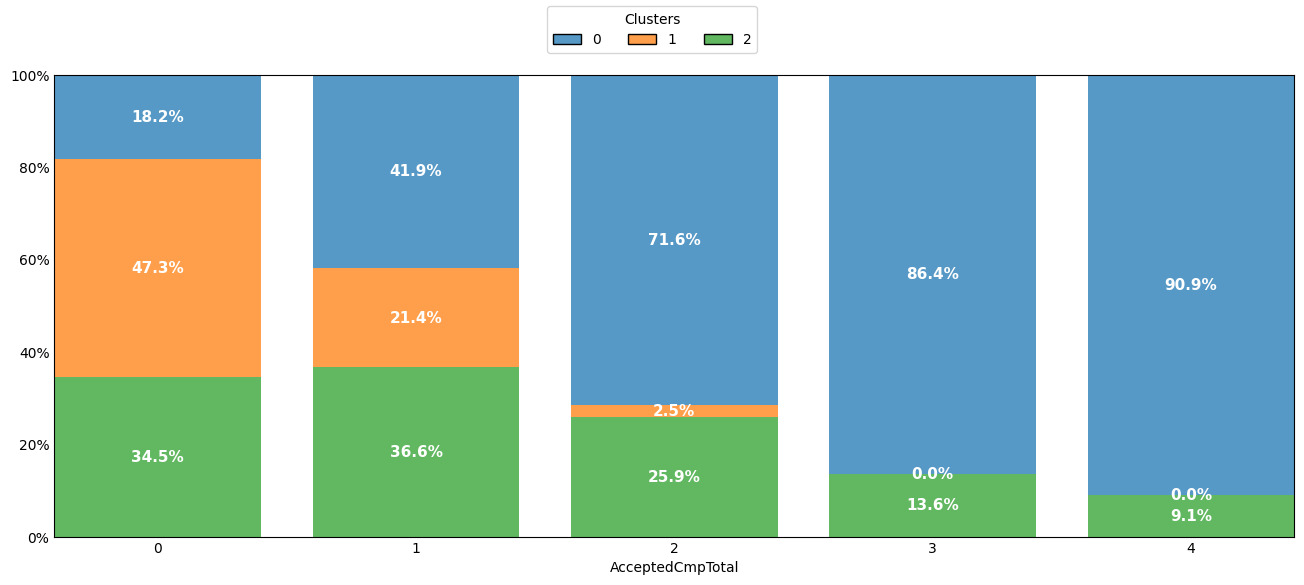

In [29]:
# Chamando a função e passsando os parâmetros
plot_columns_percent_hue_cluster(
    dataframe = df_clustered,
    # Passando a coluna de interesse na forma de uma Lista com apenas um elemento
    columns = ["AcceptedCmpTotal"],
    # Criando uma figura com um único sistema de eixos de 1 Linha e 1 Coluna
    rows_cols = (1, 1),
    # Ajustando o tamanho da figura
    figsize = (16, 6)
)

- ``Analizando o Histograma AcceptedCmpTotal com base nas proporções:``
    - Observamos os clientes do Cluster 1 possuem menor Gasto Total, menor Renda Anual, tem filhos, maior proporção de Educação Básica e com quase a metade dos clientes que nunca aceitaram nenhuma das 5 campanhas de marketing, sendo que esse percentual vai caindo para os clientes que aceitaram uma ou duas campanhas até zerar;
    - Para os clientes do Cluster 0 uma minoria não aceitou nenhuma campanha, chegando a 90,9% os que aceitaram todas as campanhas;

#### Visualizando colunas separadamente por ``Cluster``

- Por exemplo a coluna ``AgeGroup``

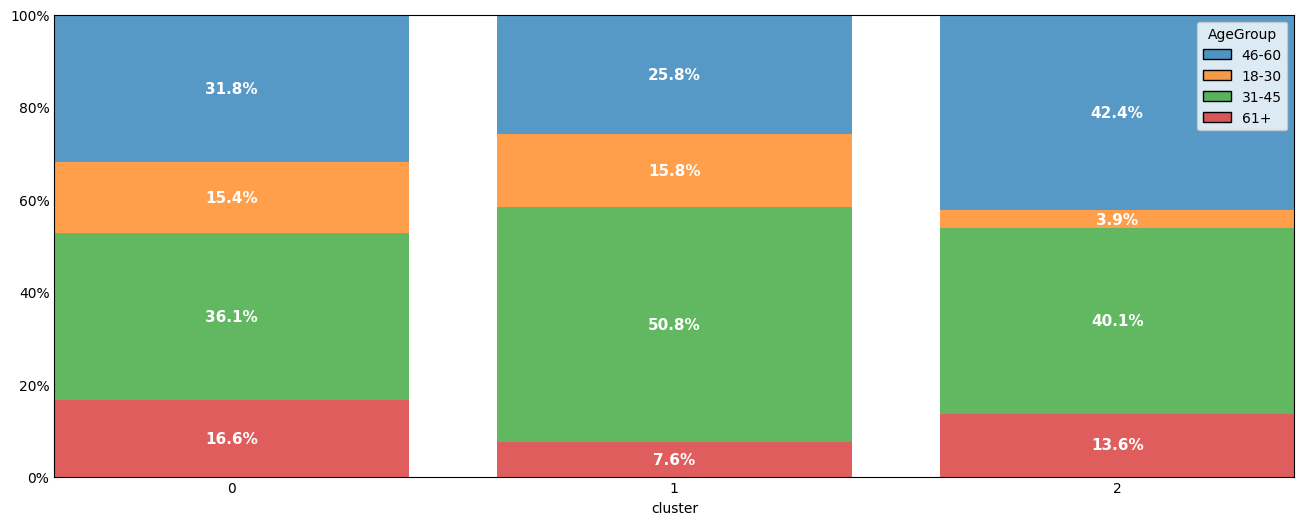

In [30]:
# Chamando a função e passsando os parâmetros
plot_columns_percent_by_cluster(
    dataframe = df_clustered,
    # Passando a coluna de interesse na forma de uma Lista com apenas um elemento
    columns = ["AgeGroup"],
    # Criando uma figura com um único sistema de eixos de 1 Linha e 1 Coluna
    rows_cols = (1, 1),
    # Ajustando o tamanho da figura
    figsize = (16, 6)
)

- ``Analizando o Histograma AgeGroup com base nas proporções:``
    - No Cluster 0 encontra-se uma alta proporção dos grupos de 31-45 e de 46-60, portanto de meia idade;
    - No Cluster 1 encontra-se uma alta proporção dos grupos de 18-30 e de 31-45, portanto mais jovens;
    - No Cluster 2 encontra-se uma alta proporção dos grupos de 46-60 e 61+, portanto com idade mais elevada;

#### Visualizando colunas separadamente por ``Hue Cluster``

- Por exemplo a coluna ``AgeGroup``

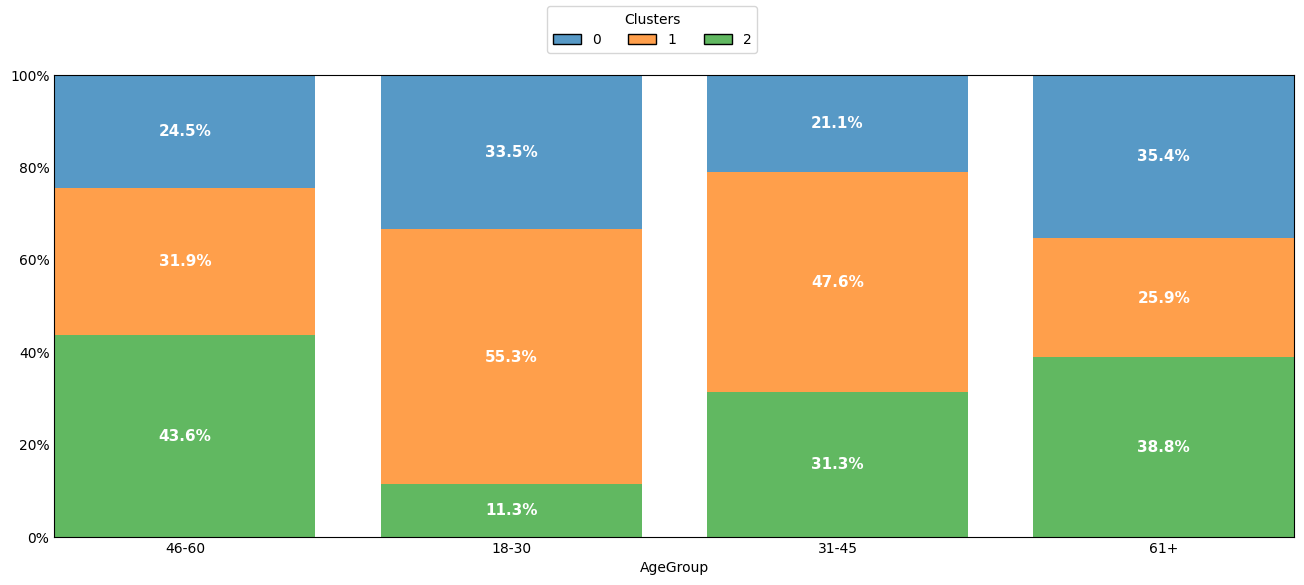

In [31]:
# Chamando a função e passsando os parâmetros
plot_columns_percent_hue_cluster(
    dataframe = df_clustered,
    # Passando a coluna de interesse na forma de uma Lista com apenas um elemento
    columns = ["AgeGroup"],
    # Criando uma figura com um único sistema de eixos de 1 Linha e 1 Coluna
    rows_cols = (1, 1),
    # Ajustando o tamanho da figura
    figsize = (16, 6)
)

- ``Analizando o Histograma AgeGroup com base nas proporções:``
    - Observamos que os clientes do Cluster 0 não possuem um perfil de idade que se destaque;
    - No Cluster 1 encontra-se uma alta proporção dos grupos de 18-30 e de 31-45, portanto mais jovens;
    - No Cluster 2 encontra-se uma alta proporção dos grupos de 46-60 e 61+, portanto com idade mais elevada;

#### Análise detalhada e criando os perfis para cada cluster

- Fazendo uma descrição mais qualitativa

``Análise por cluster:``

- Cluster 0: 
  - Renda alta 
  - gasto alto 
  - muito provalmente não tem filhos
  - mais propenso a aceitar campanhas
  - cluster sem pessoas com escolaridade básica
  - sem um perfil de idade que se destaque
  

- Cluster 1: 
  - Renda baixa 
  - gasto baixo 
  - provalmente tem filhos
  - baixa propensão a aceitar campanhas
  - único cluster com porcentagem significativa de pessoas com escolaridade básica
  - pessoas mais jovens
  

- Cluster 2: 
  - Renda intermediária
  - gasto intermediário
  - provalmente tem filhos
  - pode aceitar campanhas
  - pessoas com idade mais elevada

